##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

In [1]:
import pandas as pd
import json
import os
import datetime

In [2]:
def to_date(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime("%Y-%m-%d")
# first convert from milliseconds to seconds, and then convert format from time stamp

In [3]:
# this finds our txt files
filename = "data/sensorswww_data.txt"
data = []
for line in open(filename, 'r'):
    data.append(json.loads(line))

In [4]:
# total number of rows
len(data)

75092

hash: change from browser and cookie id to protect user privacy, randomnized id, can be used to conduct unbiased experiments/tran test split

In [5]:
# here I define my pandas Dataframe with the columns I want to get from the text
nocache = []
dist_id = []
event = []

browser = []
browser_v = []
ip = []
is_fd = []
is_ft = []
latest_r = []
latest_rh = []
latest_ch = []
latest_utm_campaign = []
latest_utm_content = []
latest_utm_m = []
latest_utm_s = []
latest_utm_t = []
model = []
os = []
os_version = []
screen_h = []
screen_w = []
session_r = []
session_rh = []
time = []
day = []

pageP = []
pageS = []
pageUrl = []
session_p = []
name = []
requestBtn = []
isSuccess = []
isMsg = []
page = []
site_url = []
from_url = []
referrerUrl = []
referrHostUrl = []
siteUrl = []
url_path = []
url = []
title = []
result = []
referrer = []
refer_Host = []
title = []
ch = []
tp = []

In [6]:
#define NA and use get to assign NA when the key value not found 
na = None

for i in range(len(data)):
    tp.append(data[i].get('type',na))
    nocache.append(data[i].get('_nocache',na)) 
    dist_id.append(data[i]['distinct_id'])
    event.append(data[i].get('event',na))
    pageP.append(data[i]['properties'].get('pagePosition',na))
    pageS.append(data[i]['properties'].get('pageStayTime',na))
    pageUrl.append(data[i]['properties'].get('pageUrl',na))
    session_p.append(data[i]['properties'].get('session_page_url',na))
    latest_r.append(data[i]['properties'].get('$latest_referrer',na)) 
    latest_rh.append(data[i]['properties'].get('$latest_referrer_host',na))
    latest_ch.append(data[i]['properties'].get('_latest_ch',na))
    latest_utm_campaign.append(data[i]['properties'].get('$latest_utm_campaign',na))
    latest_utm_content.append(data[i]['properties'].get('$latest_utm_content',na))
    latest_utm_m.append(data[i]['properties'].get('$latest_utm_medium',na))
    latest_utm_s.append(data[i]['properties'].get('$latest_utm_source',na))
    latest_utm_t.append(data[i]['properties'].get('$latest_utm_term',na))
    name.append(data[i]['properties'].get('name',na))
    requestBtn.append(data[i]['properties'].get('requestBtn',na))
    isSuccess.append(data[i]['properties'].get('isSuccess',na))
    isMsg.append(data[i]['properties'].get('isMsg',na))
    page.append(data[i]['properties'].get('page',na))
    site_url.append(data[i]['properties'].get('site_url',na))
    from_url.append(data[i]['properties'].get('from_url',na))
    referrerUrl.append(data[i]['properties'].get('referrerUrl',na))
    referrHostUrl.append(data[i]['properties'].get('referrHostUrl',na))
    siteUrl.append(data[i]['properties'].get('siteUrl',na))
    url_path.append(data[i]['properties'].get('$url_path',na))
    url.append(data[i]['properties'].get('$url',na))
    result.append(data[i]['properties'].get('result',na))
    referrer.append(data[i]['properties'].get('$referrer',na))
    refer_Host.append(data[i]['properties'].get('$referrer_host',na))
    title.append(data[i]['properties'].get('$title',na))
    ch.append(data[i]['properties'].get('$referrer_host',na))        
    browser.append(data[i]['properties'].get('$browser',na)) 
    browser_v.append(data[i]['properties'].get('$browser_version',na)) 
    ip.append(data[i]['properties'].get('$ip',na)) 
    is_fd.append(data[i]['properties'].get('$is_first_day',na)) 
    is_ft.append(data[i]['properties'].get('$is_first_time',na))      
    model.append(data[i]['properties'].get('$model',na))
    os.append(data[i]['properties'].get('$os',na))
    os_version.append(data[i]['properties'].get('$os_version',na))
    screen_h.append(data[i]['properties'].get('$screen_height',na))
    screen_w.append(data[i]['properties'].get('$screen_width',na))
    session_r.append(data[i]['properties'].get('_session_referrer',na))
    session_rh.append(data[i]['properties'].get('_session_referrer_host',na))
    time.append(data[i]['time'])
    day.append(to_date(data[i]['time']))

In [7]:
#generate pandas dataframe
df = pd.DataFrame({'nocache':nocache, 
    'dist_id': dist_id,
    'event':event,
    'browser':browser,
    'browser_v':browser_v,
    'ip':ip,
    'is_fd':is_fd,
    'is_ft':is_ft,
    'latest_r':latest_r,
    'latest_rh':latest_rh,
    'latest_ch':latest_ch,
    'latest_utm_campaign':latest_utm_campaign,
    'latest_utm_content':latest_utm_content,
    'latest_utm_m':latest_utm_m,
    'latest_utm_s':latest_utm_s,
    'latest_utm_t':latest_utm_t,
    'model':model,
    'os':os,
    'os_version':os_version,
    'screen_h':screen_h,
    'screen_w':screen_w,
    'screen_r':session_r,
    'screen_rh':session_rh,
    'time':time,
    'pageP':pageP,
    'pageS':pageS,
    'pageUrl':pageUrl,
    'session_p':session_p,
    'name':name,
    'requestBtn':requestBtn,
    'isSuccess':isSuccess,
    'isMsg':isMsg,
    'page':page,
    'site_url':site_url,
    'from_url':from_url,
    'referrerUrl':referrerUrl,
    'referrHostUrl':referrHostUrl,
    'siteUrl':siteUrl,
    'url_path':url_path,
    'url':url,
    'title':title,
    'result':result,
    'referrer':referrer,
    'refer_Host':refer_Host,
    'ch':ch,
    'tp':tp,
    'day':day})

In [8]:
df.head()

,browser,browser_v,ch,day,dist_id,event,from_url,ip,isMsg,isSuccess,...,screen_rh,screen_w,session_p,siteUrl,site_url,time,title,tp,url,url_path
0,chrome,56,None,2017-03-06,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,None,219.135.131.99,None,None,...,www.baidu.com,1280.0,https://www.sensorsdata.cn/?utm_source=baidu&u...,None,None,1488791047953,None,track,None,None
1,None,None,None,2017-03-31,9939d3e087bca29c42334d96dccd25ca0e06652a,None,None,None,None,None,...,None,NaN,None,None,None,1490958296645,None,profile_set_once,None,None
2,chrome,56,,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791050856,神策数据 | Sensors Data - 国内领先的用户行为分析产品,track,https://sensorsdata.cn/?ch=demo,/
3,chrome,56,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791051772,None,track,None,None
4,chrome,56,None,2017-03-06,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,None,111.204.198.242,None,None,...,,1366.0,https://sensorsdata.cn/?ch=demo,None,None,1488791056032,None,track,None,None


In [9]:
# Create Pandas DataFrame filters based on different events
df_ileave = df.loc[df.event == 'index_leave']
df_btnclick = df.loc[df.event == 'btnClick']
df_aleave = df.loc[df.event == 'about_leave']
df_form = df.loc[df.event == 'formSubmit']
df_submit = df.loc[df.event == 'clickSubmit']
df_cleave = df.loc[df.event == 'courses_leave']
df_dleave = df.loc[df.event == 'demo_leave']
df_playleave = df.loc[df.event == 'courses_play_leave']
df_close = df.loc[df.event == 'page_close']
df_view = df.loc[df.event == '$pageview']
df_send = df.loc[df.event == 'click_send_cellphone']
df_verify = df.loc[df.event == 'verify_cellphone_code']

In [10]:
# save DataFrame to csv file
ileave = 'data/index_leave.csv'
df_ileave.to_csv(ileave, index=False)
btnclick = 'data/btnClick.csv'
df_btnclick.to_csv(btnclick, index=False)
aleave = 'data/about_leave.csv'
df_aleave.to_csv(aleave, index=False)
form = 'data/formSubmit.csv'
df_form.to_csv(form, index=False)
submit = 'data/clickSubmit.csv'
df_submit.to_csv(submit, index=False)
cleave = 'data/courses_leave.csv'
df_cleave.to_csv(cleave, index=False)
dleave = 'data/demo_leave.csv'
df_dleave.to_csv(dleave, index=False)
playleave = 'data/courses_play_leave.csv'
df_playleave.to_csv(playleave, index=False)
close = 'data/page_close.csv'
df_close.to_csv(close, index=False)
view = 'data/pageview.csv'
df_view.to_csv(view, index=False)
send = 'data/click_send_cellphone.csv'
df_send.to_csv(send, index=False)
verify = 'data/verify_cellphone_code.csv'
df_verify.to_csv(verify, index=False)

In [11]:
data_all = 'data/data_all.csv'
df.to_csv(data_all, index=False)

In [12]:
df['tp'].value_counts()

track               65673
profile_set_once     9419
Name: tp, dtype: int64

track: keep track of an event, as shown in events below
profile set once: used for first time activate, register, ignored when profile already exist

In [13]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

- possible user behavior analysis: pageview, btnClick
- funnel analysis: formSubmit(791) > click_send_cellphone(600) > verify_cellphone_code(563) > clickSubmit(513)

Do more EDA here

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
df['dist_id'].describe()

count                                        75092
unique                                       11756
top       835cc4405ee7e42e5b401a25e65b4830b02af7d3
freq                                           254
Name: dist_id, dtype: object

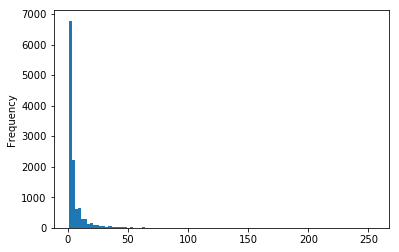

In [16]:
# e.g. calculate counts of distinct id, and plot it
df['dist_id'].value_counts().plot.hist(bins=100)

In [17]:
df['nocache'].describe()

count             75092
unique            75065
top       6176568740047
freq                  7
Name: nocache, dtype: object

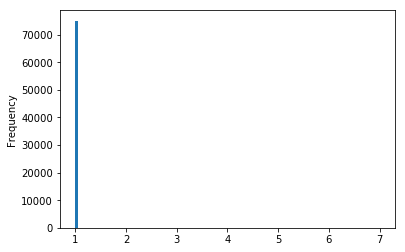

In [18]:
# e.g. calculate counts of nochache, and plot it
df['nocache'].value_counts().plot.hist(bins=100)

In [19]:
df['ip'].describe()

count               65673
unique               9870
top       113.208.116.250
freq                 1399
Name: ip, dtype: object

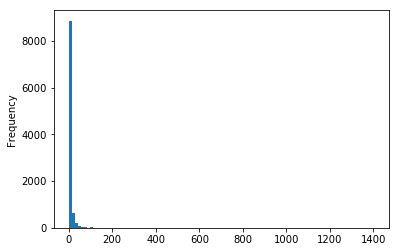

In [20]:
df['ip'].value_counts().plot.hist(bins=100)

##  Choice of identifier
- distinct_id, hash: change from browser and cookie id to protect user privacy; 11756 distinct values
- nocache: might be simplified identifier. The number of distinct nocache is 75065. The frequency is too low. 
- ip: 9870 distinct values, each ip address can have multiple users
- distinct_id is a better identifier，it is random，and can be used for unbiased experiments/tran test split

In [21]:
df['day'].describe()

count          75092
unique            10
top       2017-03-09
freq           10446
Name: day, dtype: object

/Users/Danielle/anaconda/lib/python3.6/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


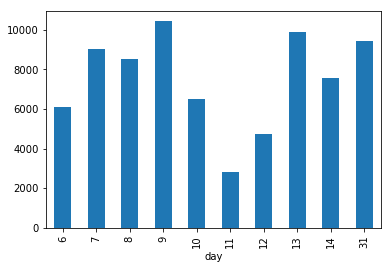

In [22]:
df["day"] = df["day"].astype("datetime64")
df["day"].groupby(df["day"].dt.day).count().plot(kind="bar")

2017 March, 11th and 12th are weekends, have the least number of counts

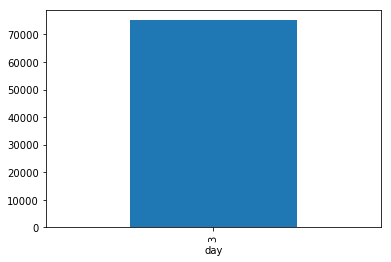

In [23]:
df["day"].groupby(df["day"].dt.month).count().plot(kind="bar")

- All the data collected on March 2017, and only distribute in 6th-14th and 31st
- 31st is a wrong data, should be eliminated from the dataset

In [24]:
df = df[df.day != "2017-03-31"]

Check missing data and propose possible missing data imputation

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65673 entries, 0 to 75090
Data columns (total 47 columns):
browser                65673 non-null object
browser_v              65673 non-null object
ch                     32335 non-null object
day                    65673 non-null datetime64[ns]
dist_id                65673 non-null object
event                  65673 non-null object
from_url               982 non-null object
ip                     65673 non-null object
isMsg                  469 non-null object
isSuccess              791 non-null object
is_fd                  65673 non-null object
is_ft                  65673 non-null object
latest_ch              8537 non-null object
latest_r               64862 non-null object
latest_rh              64862 non-null object
latest_utm_campaign    39903 non-null object
latest_utm_content     38763 non-null object
latest_utm_m           39691 non-null object
latest_utm_s           40583 non-null object
latest_utm_t           39095 non-nu

In [26]:
df.isnull().sum()

browser                    0
browser_v                  0
ch                     33338
day                        0
dist_id                    0
event                      0
from_url               64691
ip                         0
isMsg                  65204
isSuccess              64882
is_fd                      0
is_ft                      0
latest_ch              57136
latest_r                 811
latest_rh                811
latest_utm_campaign    25770
latest_utm_content     26910
latest_utm_m           25982
latest_utm_s           25090
latest_utm_t           26578
model                      0
name                   50503
nocache                    0
os                         0
os_version                 0
page                   53957
pageP                  49183
pageS                  48953
pageUrl                35317
refer_Host             33338
referrHostUrl          65204
referrer               33339
referrerUrl            65204
requestBtn             61402
result        

The rows with "profile_set_once" were exactly the mistake 31st dates that were deleted (9419 rows)
Features that have null value only at "profile_set_once" type: 
browser, browser_v, event, ip, is_fd, is_ft, model, os, os_version, screen_h, screen_w
if we consider event, all these features inclusing time, dist_id might be useful

conversion rate (the percentage of users who take a desired action) analyses

In [27]:
df['event'].value_counts()

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

In [28]:
df_dleave['dist_id'].describe()

count                                         3411
unique                                        1436
top       87091bab3fc571740f15ac4021efc4c7674776d5
freq                                            31
Name: dist_id, dtype: object

In [29]:
df_send['dist_id'].describe()

count                                          600
unique                                         501
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

In [30]:
df_verify['dist_id'].describe()

count                                          563
unique                                         472
top       6618aedb4bb5bf0002a2f500d9f1904018b1b217
freq                                             6
Name: dist_id, dtype: object

In [31]:
df_verify['result'].describe()

count     563
unique      3
top        正确
freq      528
Name: result, dtype: object

In [32]:
df_verify['dist_id'][df_verify['result']=='正确'].describe()

count                                          528
unique                                         471
top       cc03b92cbfeebd715cd97f7f3d0cff31d96322a8
freq                                             6
Name: dist_id, dtype: object

Only one user from 472 users has wrong verification code, and never has correct verification code

In [33]:
df_form['dist_id'].describe()

count                                          791
unique                                         497
top       04b0e0ed4def01a7a2881d3d8aa55c341a36cbbc
freq                                            17
Name: dist_id, dtype: object

In [34]:
df_submit['dist_id'].describe()

count                                          513
unique                                         461
top       1e31a9423d07802ba5fe38822ac548ae9c33a14d
freq                                            24
Name: dist_id, dtype: object

In [35]:
print("conversation rate of click send cellphone:")
print(501/11756)

conversation rate of click send cellphone:
0.042616536236815244


In [36]:
print("conversation rate of verify cellphone code:")
print(472/11756)

conversation rate of verify cellphone code:
0.040149710785981625


In [37]:
print("conversation rate of form submit:")
print(497/11756)

conversation rate of form submit:
0.04227628445049336


In [38]:
print("conversation rate of click submit:")
print(461/11756)

conversation rate of click submit:
0.03921401837359646


In [39]:
print("conversation rate of demo leave:")
print(1436/11756)

conversation rate of demo leave:
0.12215039128955427


The key factors that bottleneck the conversion rate is sign up/send celpphone verification

In [40]:
df_dleave.isnull().sum()

browser                   0
browser_v                 0
ch                     3411
day                       0
dist_id                   0
event                     0
from_url               3411
ip                        0
isMsg                  3411
isSuccess              3411
is_fd                     0
is_ft                     0
latest_ch              2694
latest_r                 39
latest_rh                39
latest_utm_campaign    1455
latest_utm_content     1492
latest_utm_m           1458
latest_utm_s           1426
latest_utm_t           1478
model                     0
name                   3411
nocache                   0
os                        0
os_version                0
page                   3411
pageP                     0
pageS                     0
pageUrl                   0
refer_Host             3411
referrHostUrl          3411
referrer               3411
referrerUrl            3411
requestBtn             3411
result                 3411
screen_h            

Total number of rows in btnclick: 3411
Pssible useful feature: session_r, session_rh, session_page_url, pageStayTime, pagePosition, pageUrl

In [41]:
df_dleave.session_p.value_counts(dropna=True)

https://www.sensorsdata.cn/                                                                                                                                                                                                                                                                                                                                                                                                                         815
https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_content=%E5%93%81%E7%89%8C%2D%E7%A5%9E%E7%AD%96&utm_campaign=%E5%93%81%E7%89%8C%E8%AF%8D                                                                                                                                                                                                                                                                427
https://www.sensorsdata.cn/demo.html                                                                                    

In [42]:
df_dleave.screen_r.value_counts(dropna=True)

https://www.baidu.com/baidu.php                                                                                                                                                                             1298
                                                                                                                                                                                                            1108
https://www.baidu.com/link                                                                                                                                                                                   268
https://www.baidu.com/s                                                                                                                                                                                       83
https://www.google.com/                                                                                                                                             

In [43]:
df_dleave.screen_rh.value_counts(dropna=True)

www.baidu.com                             1725
                                          1106
www.sensorsdata.cn                         146
www.sogou.com                               71
www.google.com                              55
www.google.com.hk                           44
link.zhihu.com                              35
www.so.com                                  32
www.google.co.jp                            26
sensorsdata.cn                              17
36kr.com                                    14
qiye.aliyun.com                             13
cn.bing.com                                 12
mp.weixinbridge.com                         10
www.google.com.ph                           10
www.google.com.au                            8
www.woshipm.com                              5
www.itjuzi.com                               5
mail.qq.com                                  5
wenku.baidu.com                              5
exmail.qq.com                                5
passport.36kr

session_page_url extract referrer data to session_r, and further clean the data to session_rh. 
The last two have over 1000 empty rows.
We can see how the session_r/session_rh classify as empty

In [44]:
df_dleave['session_p'].loc[df_dleave['screen_r'] == '']

16                    https://www.sensorsdata.cn/demo.html
34                    https://www.sensorsdata.cn/demo.html
38                    https://www.sensorsdata.cn/demo.html
42                    https://www.sensorsdata.cn/demo.html
48                    https://www.sensorsdata.cn/demo.html
56                    https://www.sensorsdata.cn/demo.html
107                        https://sensorsdata.cn/?ch=demo
139                   https://www.sensorsdata.cn/demo.html
150                                https://sensorsdata.cn/
154                                https://sensorsdata.cn/
172                            https://www.sensorsdata.cn/
173                            https://www.sensorsdata.cn/
255                   https://www.sensorsdata.cn/demo.html
399         https://www.sensorsdata.cn/demo.html?winzoom=1
424                   https://www.sensorsdata.cn/demo.html
427                   https://www.sensorsdata.cn/demo.html
473         https://www.sensorsdata.cn/demo.html?winzoom

most of empty session_r and session_rh are directly from sensordata website, a few have utm_s: baidu

In [45]:
df_dleave.latest_utm_s.value_counts(dropna=True)

baidu                 1841
sogou                   60
sales4c                 18
google                  11
wechat                  10
tianguang                9
admin                    9
zhihu                    7
liujinbo1                4
sanjieke.cn              4
hao.caibaojian.com       2
next.36kr.com            2
sunwenliang              2
yupan                    1
gaoxiaoqing              1
linhuiyong               1
qiye.36kr.com            1
sina                     1
liuyaozhou               1
Name: latest_utm_s, dtype: int64

latest_utm_s has 1426 empty, they come from sesordata website directly
considering the number, we can bin this feature as baidu and not baidu

In [70]:
df['source'] = (df.latest_utm_s == 'baidu') * 1

In [71]:
df.source.value_counts(dropna=True)

1    36085
0    29588
Name: source, dtype: int64

In [46]:
df_dleave.pageUrl.value_counts(dropna=True)

https://www.sensorsdata.cn/demo.html                                                                                                                                                                                                                                2633
https://sensorsdata.cn/demo.html                                                                                                                                                                                                                                     736
https://www.sensorsdata.cn/demo.html?winzoom=1                                                                                                                                                                                                                        29
https://sensorsdata.cn/demo.html?winzoom=1                                                                                                                                                                   

In [47]:
df_dleave.pageP.value_counts(dropna=True)

1.0    3411
Name: pageP, dtype: int64

PageUrl and PageP has the same information: demo page

In [48]:
df_dleave.pageS.describe()

count    3.411000e+03
mean     1.199060e+04
std      7.518954e+04
min      8.400000e-02
25%      4.633000e+00
50%      3.514100e+01
75%      1.085848e+03
max      2.918014e+06
Name: pageS, dtype: float64

In [49]:
df_btnclick.isnull().sum()

browser                    0
browser_v                  0
ch                     13866
day                        0
dist_id                    0
event                      0
from_url               13866
ip                         0
isMsg                  13866
isSuccess              13866
is_fd                      0
is_ft                      0
latest_ch              11837
latest_r                  78
latest_rh                 78
latest_utm_campaign     5227
latest_utm_content      5451
latest_utm_m            5263
latest_utm_s            5069
latest_utm_t            5383
model                      0
name                       0
nocache                    0
os                         0
os_version                 0
page                    2150
pageP                  13866
pageS                  13866
pageUrl                    0
refer_Host             13866
referrHostUrl          13866
referrer               13866
referrerUrl            13866
requestBtn             10899
result        

Total number of rows in btnclick: 13866; posible features with not too much null values.
latest_r                  78
latest_rh                 78
latest_utm_campaign     5227
latest_utm_content      5451
latest_utm_m            5263
latest_utm_s            5069
latest_utm_t            5383
page                    2150
pageUrl                    0
screen_h                   0
screen_r                   0
screen_rh                  0
screen_w                   0
session_p                  2

In [50]:
df_btnclick.latest_utm_s.value_counts()

baidu                 7921
sogou                  368
sales4c                 96
wechat                  78
admin                   71
google                  70
sanjieke.cn             69
sunwenliang             22
mulumu.com              18
tianguang               14
next.36kr.com           11
gaoxiaoqing             10
liuyaozhou               9
zhihu                    9
sina                     6
hao.caibaojian.com       5
toutiao.io               5
liujinbo1                4
admin10                  3
qiye.36kr.com            2
email                    2
shenyulong               2
linhuiyong               1
yupan                    1
Name: latest_utm_s, dtype: int64

In [51]:
df_btnclick.page.value_counts()

index            7964
demo             2242
about             816
courses_index     694
Name: page, dtype: int64

In [52]:
df_btnclick.name.value_counts()

request     2967
demo        2783
document    2067
product     1942
b-round     1245
about        925
blog         803
viedo        550
logo         508
mail          76
Name: name, dtype: int64

btnclick has 2242 demo in page and 2783 demo in name, while demo leave has 3411 items

In [53]:
df_view.isnull().sum()

browser                    0
browser_v                  0
ch                       285
day                        0
dist_id                    0
event                      0
from_url               32620
ip                         0
isMsg                  32620
isSuccess              32620
is_fd                      0
is_ft                      0
latest_ch              28948
latest_r                 587
latest_rh                587
latest_utm_campaign    13847
latest_utm_content     14498
latest_utm_m           13975
latest_utm_s           13507
latest_utm_t           14330
model                      0
name                   32620
nocache                    0
os                         0
os_version                 0
page                   32620
pageP                  32620
pageS                  32620
pageUrl                32620
refer_Host               285
referrHostUrl          32620
referrer                 286
referrerUrl            32620
requestBtn             32620
result        

Total number of rows in page view: 32620

In [54]:
df_view.title.value_counts(dropna=True)

神策数据 | Sensors Data - 国内领先的用户行为分析产品                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     13700
神策分析|Sensors Analytics-帮你实现数据驱动－demo                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [55]:
df_view.ch.value_counts()[df_view['ch'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
image.baidu.com                              67
www.so.com                                   67
www.google.co.jp                             48
ebizdemo.cloud.sensorsdata.cn                41
googleads.g.doubleclick.net                  41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

In [56]:
df_view.refer_Host.value_counts()[df_view['refer_Host'].value_counts()>10]

www.sensorsdata.cn                        12634
                                           7091
www.baidu.com                              6284
sensorsdata.cn                             2764
m.baidu.com                                 816
www.sogou.com                               352
36kr.com                                    208
www.google.com.hk                           166
www.google.com                              156
localhost                                   154
m.sogou.com                                 147
link.zhihu.com                              146
wap.sogou.com                               144
image.baidu.com                              67
www.so.com                                   67
www.google.co.jp                             48
ebizdemo.cloud.sensorsdata.cn                41
googleads.g.doubleclick.net                  41
www.woshipm.com                              34
cn.bing.com                                  33
zhidao.baidu.com                        

refer_Host same as ch

In [57]:
df_view.screen_rh.value_counts()[df_view['screen_rh'].value_counts()>10]

www.baidu.com                             14770
                                           8361
www.sensorsdata.cn                         1054
m.baidu.com                                 994
36kr.com                                    790
www.sogou.com                               735
www.google.com.hk                           445
www.google.com                              372
sensorsdata.cn                              293
www.so.com                                  234
link.zhihu.com                              189
m.sogou.com                                 165
wap.sogou.com                               150
www.google.co.jp                            122
cn.bing.com                                 122
www.woshipm.com                              64
image.baidu.com                              61
class.sanjieke.cn                            50
www.itjuzi.com                               49
googleads.g.doubleclick.net                  43
wenku.baidu.com                         

In [58]:
df_view.latest_utm_s.value_counts()[df_view['latest_utm_s'].value_counts()>10]

baidu                 16756
sogou                   975
wechat                  258
sales4c                 225
admin                   205
google                  205
sanjieke.cn             123
next.36kr.com            34
sunwenliang              29
tianguang                25
liujinbo1                25
mulumu.com               24
hao.caibaojian.com       22
liuyaozhou               21
sina                     18
admin10                  17
analytics_test           15
gaoxiaoqing              15
zhihu                    11
guohongyao               11
Name: latest_utm_s, dtype: int64

Session referrer host similar to refer_Host and ch, but more null values
Same as the analysis on btnclick and page view, use latest_utm

- Analysis on the reason for demo leave
- Note that we can find utm_source on other data frame to see if we can find not null values

In [59]:
import geoip2.database

In [60]:
# read library from local file
reader = geoip2.database.Reader('./data/GeoLite2-Country_20180206/GeoLite2-Country.mmdb')

In [61]:
# example usage of geoip2 
response = reader.country('219.135.131.99')

In [62]:
response.country.iso_code

'CN'

In [66]:
# Define CN: dist_id has ip address in China
#df['CN'] = df['ip'].apply(lambda row: reader.country(row).country.iso_code == 'CN')
CN=[]
for i in range(len(df['ip'])):
    try:
        CN.append ((reader.country(df.loc[i,'ip']).country.iso_code == 'CN') * 1)
    except:
        CN.append('')

In [68]:
df['CN'] = CN

In [69]:
df.CN.value_counts(dropna=True)

1    56427
      8296
0      950
Name: CN, dtype: int64

In [72]:
df_ip = df[df.CN != '']

In [74]:
df_dleave_ip = df_ip.loc[df.event == 'demo_leave']

In [130]:
df_dleave = df.loc[df.event == 'demo_leave']

In [131]:
df_dleave.isnull().sum()

browser                   0
browser_v                 0
ch                     3411
day                       0
dist_id                   0
event                     0
from_url               3411
ip                        0
isMsg                  3411
isSuccess              3411
is_fd                     0
is_ft                     0
latest_ch              2694
latest_r                 39
latest_rh                39
latest_utm_campaign    1455
latest_utm_content     1492
latest_utm_m           1458
latest_utm_s           1426
latest_utm_t           1478
model                     0
name                   3411
nocache                   0
os                        0
os_version                0
page                   3411
pageP                     0
pageS                     0
pageUrl                   0
refer_Host             3411
referrHostUrl          3411
referrer               3411
referrerUrl            3411
requestBtn             3411
result                 3411
screen_h            

In [132]:
df_dleave['weekend'] = ((df_dleave.day == '2017-03-11') | (df_dleave.day == '2017-03-12')) * 1

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
ind = df_dleave.dist_id.isin(df_send.dist_id) *1

In [141]:
df_dleave['signup'] = ind.tolist()

/Users/Danielle/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
df_dleave_select = df_dleave.sort_values(['time'],ascending=False).groupby('dist_id').first()

In [143]:
df_dleave_select.weekend.value_counts(dropna=True)

0    1312
1     124
Name: weekend, dtype: int64

dleave has 1436 distinct id in total

In [144]:
df_dleave_select.signup.value_counts(dropna=True)

0    1027
1     409
Name: signup, dtype: int64

In [145]:
df_dleave_select.isnull().sum()

browser                   0
browser_v                 0
ch                     1436
day                       0
event                     0
from_url               1436
ip                        0
isMsg                  1436
isSuccess              1436
is_fd                     0
is_ft                     0
latest_ch              1220
latest_r                 16
latest_rh                16
latest_utm_campaign     634
latest_utm_content      648
latest_utm_m            634
latest_utm_s            621
latest_utm_t            644
model                     0
name                   1436
nocache                   0
os                        0
os_version                0
page                   1436
pageP                     0
pageS                     0
pageUrl                   0
refer_Host             1436
referrHostUrl          1436
referrer               1436
referrerUrl            1436
requestBtn             1436
result                 1436
screen_h                  0
screen_r            

In [148]:
selected_columns = [u'browser',u'browser_v',u'day', u'is_fd', 
                     u'is_ft', u'ip', u'latest_utm_s',u'model', u'os', u'os_version',
                     u'pageS', u'time', u'CN', u'source', u'weekend',u'signup']

In [149]:
cleaned_data_csv = 'data/cleaned_data.csv'
df_dleave_select[selected_columns].to_csv(cleaned_data_csv, index=False)

In [ ]:
df = df.sort_values(['latest_utm_s'],ascending=False).groupby('dist_id')

In [158]:
df['dist_id','latest_utm_s'].tail(10)

,dist_id,latest_utm_s
70151,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
70154,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
70198,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
70193,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
70194,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
70206,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
612,5d06e59f1107ef51b2b04a4fc337c9c102d024e3,zhihu
70196,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu
613,5d06e59f1107ef51b2b04a4fc337c9c102d024e3,zhihu
71234,9bcff4ab72ebd7d5b3ea3251e21b3c21b8a61e50,zhihu


Try to check if we can use the first time source for anlysis, seems to be the same